# Analysis of GJ9824 Spectra

## Cleaning and Plotting data

In this step, we will plot all available data for the Star and also look at the Lomb Scargle Periodogram to identfy possible RV signals due to planets, companions stars or mag activity. Before this is done the blaze function is fitted to the original blaze uncorrected spectra. Please check if the provided targetname and spectra directory are correct.

In [1]:
star_name = 'GJ9824'
directory_name = '/home/aaron/Desktop/ZASPE/Spectra/GJ9824'

## Calculate wavelength calibration from Polynomials

In [2]:
     
from funcs import collect_fits_files, separate_fits_files
    
fits_files = collect_fits_files(directory_name,extension="A.fits")
fits_files, ccf_files = separate_fits_files(fits_files)
    
from funcs import calculate_wavelengths 

wavelengths = calculate_wavelengths(fits_files, directory_name)
observed_wavelengths = wavelengths     
    

Shape of wavelengths array: (124, 72, 4096)


### Apply the blaze correction by fitting a Polynomial to Blaze Uncorrected Spectra

In [8]:
   
from funcs import apply_blaze_correction

discarded_nights = apply_blaze_correction(observed_wavelengths,fits_files,ccf_files,directory_name)

  0%|          | 0/124 [00:00<?, ?it/s]

In [3]:
discarded_nights = []
#remove nights to be discarded
import numpy as np
if len(discarded_nights) != 0:
    wavelenghts = np.delete(wavelengths,discarded_nights,axis = 0)
    fits_files = [fits_file for i, fits_file in enumerate(fits_files) if i not in discarded_nights]
    ccf_files = [ccf_file for i, ccf_file in enumerate(ccf_files) if i not in discarded_nights]  
    
    
#collect all fits files in the given directory
fits_files = collect_fits_files(directory_name, extension = 'blaze_correction.fits')
    

### Plot the blaze corrected spectra

The the step takes long due to extensive plotting. The .png files are stored in Plots/star_name_observer_night.png. The star name is obtained from simbad. Default is Gliese catalog, if not available it will use Henry Draper and otherwise Tess Input. \ You do not have to run the next 2 cells as it takes long. However, if you are interested in how the spectra look, you might want to take a peak.

  0%|          | 0/124 [00:00<?, ?it/s]

KeyboardInterrupt: 

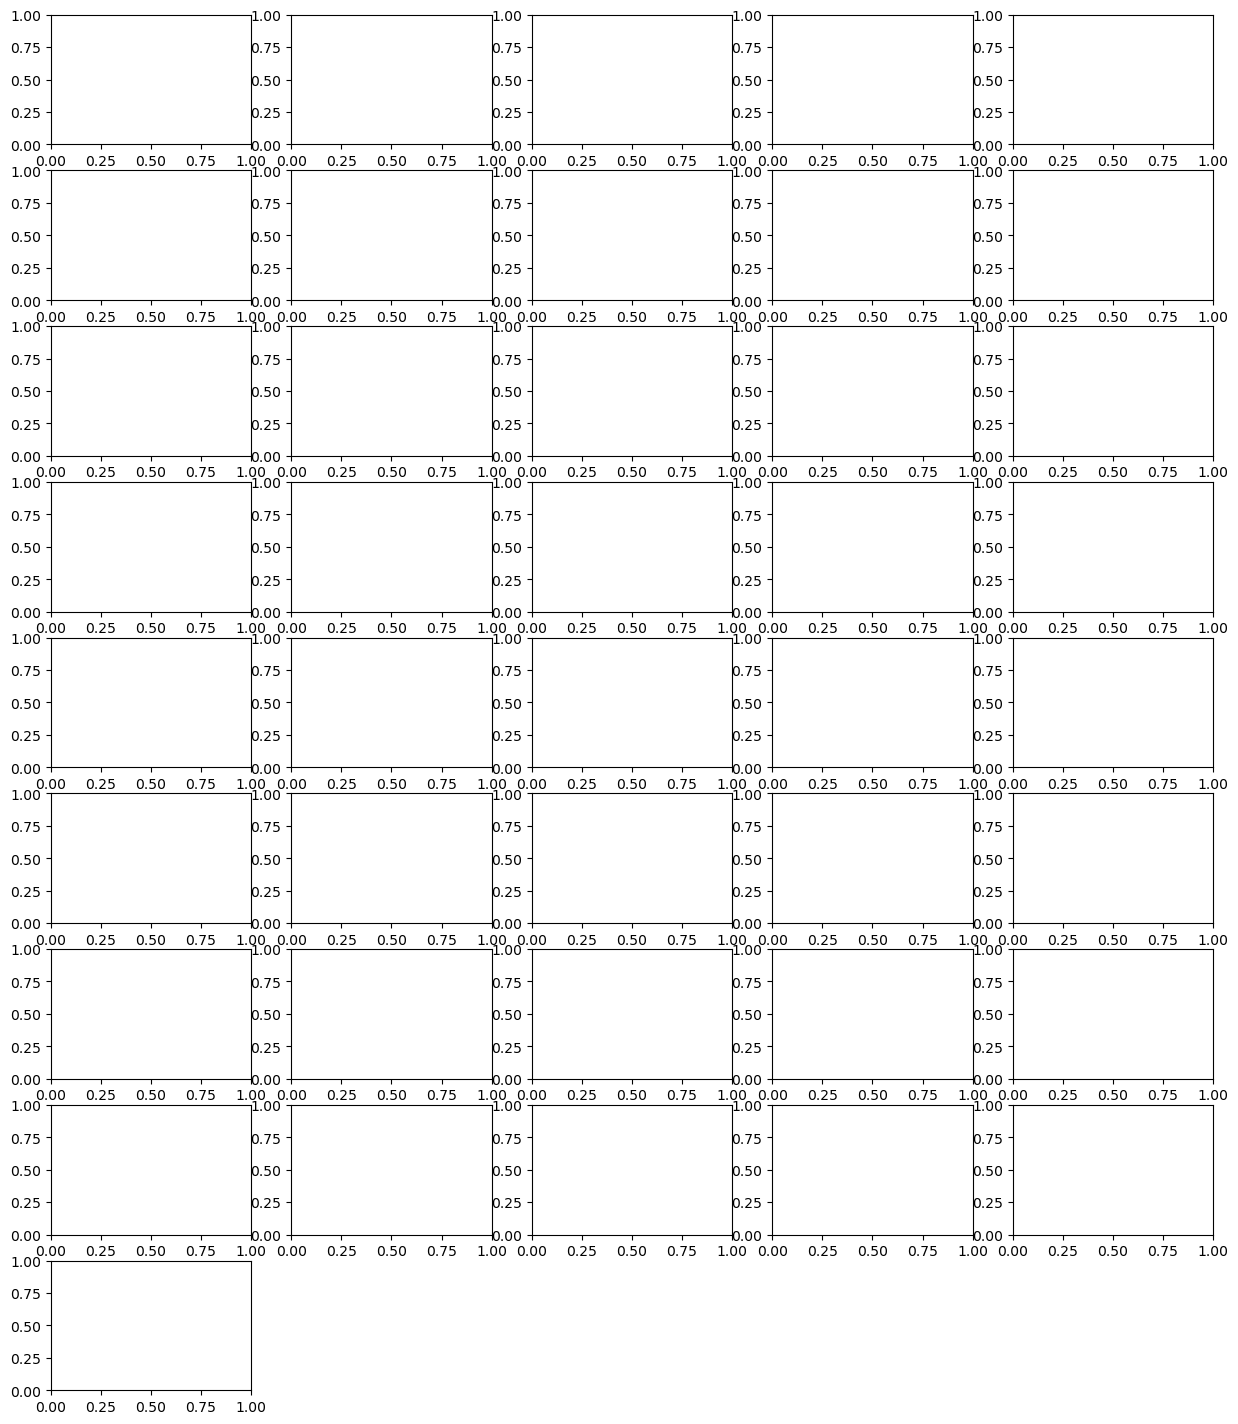

In [10]:

from funcs import plot_arrays, query_tic_name,query_gliese_name,query_HD_name, extract_target_info, extract_target_info_astropy
import matplotlib.pyplot as plt
from astropy.io import fits 
from tqdm.notebook import tqdm
from time import sleep
import re

for i in tqdm(range(len(fits_files))): 
    spectrum = fits.getdata(fits_files[i])
    flux = spectrum[3,:] #CERES pipeline blaze corrected flux
    wavelength = spectrum[0,:]
    string = fits_files[i] 
    cut_string = string.split("/")[-1][:38] + ".png"
    
    target_name, observed_night = extract_target_info_astropy(fits_files[i])
    t1 = target_name 
    if target_name.startswith("GJ") == False:
        target_name = query_gliese_name(target_name)    #try to get gliese id
    if target_name == "Unknown":
        target_name = query_HD_name(t1)   #try to get HD id
    if target_name == "Unknown":
        target_name = query_tic_name(t1) # try to get TIC id
      
      
    #make sure there is no whitespaces in the target_name
    pattern = re.compile(r'\s+')
    target_name = re.sub(pattern, '', target_name)
    
    file_name = target_name + observed_night + ".png"
    save_dir = "Plots/" + target_name
    
    plot_arrays(flux,wavelength,save_dir=save_dir, save_filename=file_name) #i think this should be better programmed some how
    
    sleep(3)

In [11]:

#example plot
#add the file you intend to show
example_file = save_dir + "/" + file_name
from IPython.display import display, Image
display(Image(filename=example_file))

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/GJ9824/GJ98242021-10-04T01:57:11.946.png'

### RV Analyis

In [4]:

from funcs import get_RV_BJD
#obtain RV, RV uncertainty and BJD from the CCFs 
rv, rv_err, bjd = get_RV_BJD(ccf_files)

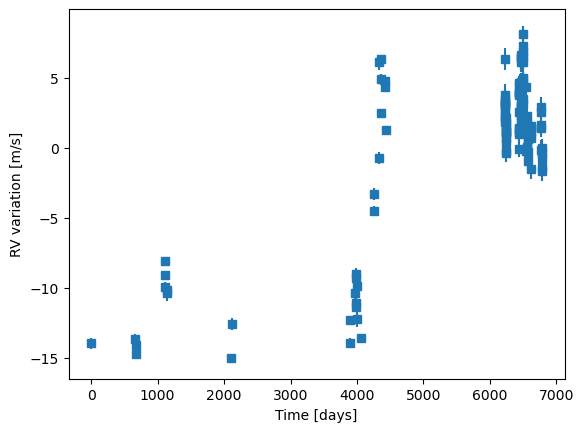

In [5]:

#plotting the RV variation
from funcs import plot_rvs

save_dir = 'Plots/' + star_name 
file_name = star_name + "_RV_variation.png"
plot_rvs(rv,rv_err/1000, bjd,save_dir, file_name) 

<IPython.core.display.Javascript object>


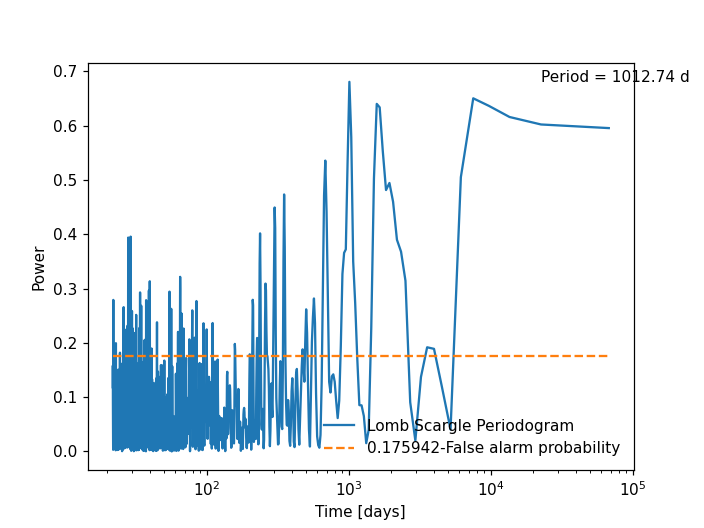

In [6]:
%matplotlib notebook
#plotting the LS Periodogram
from funcs import plot_lomb_scargle

file_name = star_name + "_Lomb_Scargle.png"
plot_lomb_scargle(bjd, rv, rv_err/1000, save_dir= save_dir, save_filename=file_name)

## Combine and Align Spectra

In this step, we will combine and align all available spectra in the same time frame while removing artifacts that we dont want to have in the combined spectra, like saturation or cosmic rays. We will use two methods to combine the spectra - RV - correction method and Cross-Correlation Method.

### RV correction method

The RV correction is performed using the measured RVs by Harps. The wavelengths are then corrected for RV shift due to different time frames and moved to the first obervation night.

Night 1 in Order 0 has been discarded due to non-contributing flux.
Night 2 in Order 0 has been discarded due to non-contributing flux.
Night 3 in Order 0 has been discarded due to non-contributing flux.
Night 5 in Order 0 has been discarded due to non-contributing flux.
Night 6 in Order 0 has been discarded due to non-contributing flux.
Night 9 in Order 0 has been discarded due to non-contributing flux.
Night 30 in Order 0 has been discarded due to non-contributing flux.
Night 2 in Order 2 has been discarded due to non-contributing flux.
Night 3 in Order 2 has been discarded due to non-contributing flux.
Night 5 in Order 2 has been discarded due to non-contributing flux.
Night 6 in Order 2 has been discarded due to non-contributing flux.
Night 9 in Order 2 has been discarded due to non-contributing flux.
Night 2 in Order 3 has been discarded due to non-contributing flux.
Night 3 in Order 3 has been discarded due to non-contributing flux.
Night 5 in Order 3 has been discarded due to no

Night 2 in Order 21 has been discarded due to non-contributing flux.
Night 3 in Order 21 has been discarded due to non-contributing flux.
Night 5 in Order 21 has been discarded due to non-contributing flux.
Night 6 in Order 21 has been discarded due to non-contributing flux.
Night 9 in Order 21 has been discarded due to non-contributing flux.
Night 27 in Order 21 has been discarded due to non-contributing flux.
Night 28 in Order 21 has been discarded due to non-contributing flux.
Night 29 in Order 21 has been discarded due to non-contributing flux.
Night 30 in Order 21 has been discarded due to non-contributing flux.
Night 2 in Order 22 has been discarded due to non-contributing flux.
Night 3 in Order 22 has been discarded due to non-contributing flux.
Night 5 in Order 22 has been discarded due to non-contributing flux.
Night 6 in Order 22 has been discarded due to non-contributing flux.
Night 9 in Order 22 has been discarded due to non-contributing flux.
Night 27 in Order 22 has been 

Night 3 in Order 43 has been discarded due to non-contributing flux.
Night 5 in Order 43 has been discarded due to non-contributing flux.
Night 6 in Order 43 has been discarded due to non-contributing flux.
Night 25 in Order 43 has been discarded due to non-contributing flux.
Night 27 in Order 43 has been discarded due to non-contributing flux.
Night 28 in Order 43 has been discarded due to non-contributing flux.
Night 29 in Order 43 has been discarded due to non-contributing flux.
Night 30 in Order 43 has been discarded due to non-contributing flux.
Night 3 in Order 44 has been discarded due to non-contributing flux.
Night 5 in Order 44 has been discarded due to non-contributing flux.
Night 6 in Order 44 has been discarded due to non-contributing flux.
Night 25 in Order 44 has been discarded due to non-contributing flux.
Night 27 in Order 44 has been discarded due to non-contributing flux.
Night 28 in Order 44 has been discarded due to non-contributing flux.
Night 29 in Order 44 has b

Night 3 in Order 65 has been discarded due to non-contributing flux.
Night 5 in Order 65 has been discarded due to non-contributing flux.
Night 6 in Order 65 has been discarded due to non-contributing flux.
Night 27 in Order 65 has been discarded due to non-contributing flux.
Night 28 in Order 65 has been discarded due to non-contributing flux.
Night 29 in Order 65 has been discarded due to non-contributing flux.
Night 30 in Order 65 has been discarded due to non-contributing flux.
Night 3 in Order 66 has been discarded due to non-contributing flux.
Night 5 in Order 66 has been discarded due to non-contributing flux.
Night 6 in Order 66 has been discarded due to non-contributing flux.
Night 27 in Order 66 has been discarded due to non-contributing flux.
Night 28 in Order 66 has been discarded due to non-contributing flux.
Night 29 in Order 66 has been discarded due to non-contributing flux.
Night 30 in Order 66 has been discarded due to non-contributing flux.
Night 3 in Order 67 has be

<IPython.core.display.Javascript object>


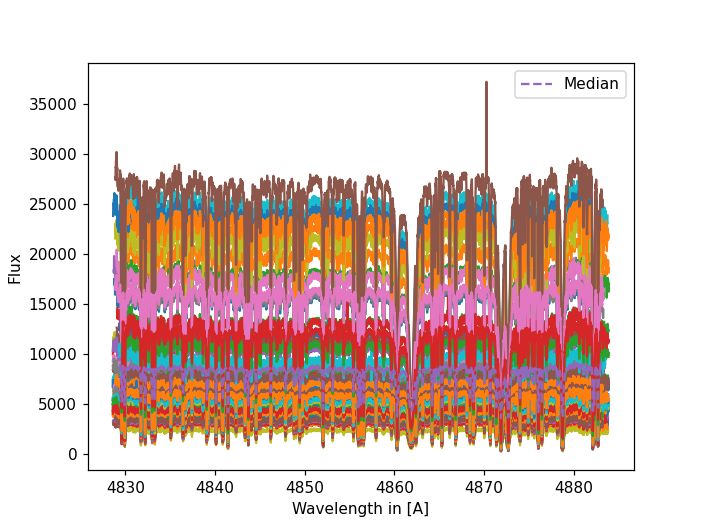

In [7]:
  
import scipy.constants as c

c_km = c.c/1000 
    
    
%matplotlib notebook
from funcs import plot_fluxes, plot_median_spectrum, interpolate_flux, get_wavelength_flux_RV, save_spectrum_as_text 

#get fit files
filelist = fits_files

#get observed wavelength, flux and eflux; extract RV and calculate corrected wavelength
wave, flux, eflux, RV, BERV, wave_corr, combined_orders = get_wavelength_flux_RV(filelist, ceres = False)

#get reference wavelength from first observation night 
wave_ref_corr = wave[0] / (1 + RV[0] / c_km) 

#interpolate flux at corrected wavelength and on the corrected wavelegnths reference
flux_interp = interpolate_flux(wave, flux, wave_ref_corr, RV, BERV)

#median flux for specific order
flux_median = np.median(flux_interp, axis=0)

#controll plots for specific order
norder = 35 
plot_fluxes(wave_corr, flux, norder) 
plot_median_spectrum(wave_ref_corr, flux_median+3000, norder)   

#save the spectrum as txt file for ZASPE
save_directory = "Spectra/" + star_name 
file_name = star_name + "_RV_method.txt"
save_spectrum_as_text(combined_orders, wave_ref_corr, flux_median, save_directory, file_name)
    

### Cross-correlation method

The cross-correlation method takes the median flux from the RV method as star templat to correlate with. It then performes combines and alignes the spectra via cross correlation to the reference template. At the moment there are some issus with the cc method why using only RV method is recommended. In principle should the RV method result in the most accurate shift to the assigned reference spectrum.

In [11]:
    
from funcs import align_spectra
from funcs import combine_spectra
from astropy.io import fits 
import matplotlib.pyplot as plt

num_orders = np.shape(fits.getdata(fits_files[0]))[1]

#template is the RV corrected version
template = flux_median 

#Specify the spectral order to combine
combined_spectra = []
for i in range(num_orders):
    combined_spectrum = combine_spectra(fits_files, i, template, blaze_corrected=True)
    combined_spectra.append(np.array(combined_spectrum))

combined_spectra = np.array(combined_spectra)


Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-25T07:34:22.830_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 806.8903963811603
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 1044.6093194556988
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 990.9794117436802
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 1209.3369708929984
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 1

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-25T07:34:22.830_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 2244.5114369333705
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 2959.909067910492
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 2840.292139467746
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 3447.9341867092076
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 2

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-25T07:34:22.830_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 5133.502835618934
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 6639.809615034599
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 6722.11705232327
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 8192.41051271115
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 9217.33747731325
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 9280.112839438978
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 11313.753405436208
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 10081.873966466004
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2009-07-28T06:45:10.680_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median val

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 20 has been discarded due to significant deviation. Median value 13164.650149541683
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 20 has been discarded due to significant deviation. Median value 13364.42218133798
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 20 has been discarded due to significant deviation. Median value 15670.818001463522
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 20 has been discarded due to significant deviation. Median value 14118.421009180785
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2009-07-28T06:45:10.680_blaze_correction.fits in order 20 has been discarded due to significant deviation. Median v

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 20955.42788903803
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 23944.212427122202
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 24723.074635080746
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 22217.454642579985
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2009-07-28T06:45:10.680_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median v

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 30 has been discarded due to significant deviation. Median value 25479.797270950876
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 30 has been discarded due to significant deviation. Median value 26746.499658119305
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 30 has been discarded due to significant deviation. Median value 29705.975675477654
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 30 has been discarded due to significant deviation. Median value 26925.348013096682
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-12T03:38:06.077_blaze_correction.fits in order 30 has been discarded due to significant deviation. Median 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T06:22:18.099_blaze_correction.fits in order 36 has been discarded due to significant deviation. Median value 29153.971349443447
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 36 has been discarded due to significant deviation. Median value 30868.67285645045
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 36 has been discarded due to significant deviation. Median value 33969.06734228208
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 36 has been discarded due to significant deviation. Median value 31152.401618685253
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-12T03:38:06.077_blaze_correction.fits in order 36 has been discarded due to significant deviation. Median va

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 42 has been discarded due to significant deviation. Median value 33039.01637580487
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 42 has been discarded due to significant deviation. Median value 36683.349113949276
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 42 has been discarded due to significant deviation. Median value 34108.293751705125
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-05T05:02:40.780_blaze_correction.fits in order 42 has been discarded due to significant deviation. Median value 33073.133417864476
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-12T03:38:06.077_blaze_correction.fits in order 42 has been discarded due to significant deviation. Median v

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 48 has been discarded due to significant deviation. Median value 44107.63008504112
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 48 has been discarded due to significant deviation. Median value 41348.41817998674
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-05T05:02:40.780_blaze_correction.fits in order 48 has been discarded due to significant deviation. Median value 41249.88961176985
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-12T03:38:06.077_blaze_correction.fits in order 48 has been discarded due to significant deviation. Median value 46578.942803664984
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-11-29T02:06:06.338_blaze_correction.fits in order 48 has been discarded due to significant deviation. Median val

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-11-29T02:06:06.338_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 80637.54589695131
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-12-09T00:51:50.744_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 69003.70773190956
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-12-15T00:24:09.236_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 76730.75544278455
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-11-29T02:06:06.338_blaze_correction.fits in order 58 has been discarded due to significant deviation. Median value 75821.05594690658
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-12-09T00:51:50.744_blaze_correction.fits in order 58 has been discarded due to significant deviation. Median valu

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2005-08-26T07:36:17.761_blaze_correction.fits in order 66 has been discarded due to significant deviation. Median value 54302.04265761475
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-13T01:50:00.032_blaze_correction.fits in order 66 has been discarded due to significant deviation. Median value 60842.02930225368
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2006-11-15T02:24:16.016_blaze_correction.fits in order 66 has been discarded due to significant deviation. Median value 56602.287799042664
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-10-12T03:38:06.077_blaze_correction.fits in order 66 has been discarded due to significant deviation. Median value 54673.38475585436
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ9824/HARPS2015-11-29T02:06:06.338_blaze_correction.fits in order 66 has been discarded due to significant deviation. Median val

<IPython.core.display.Javascript object>


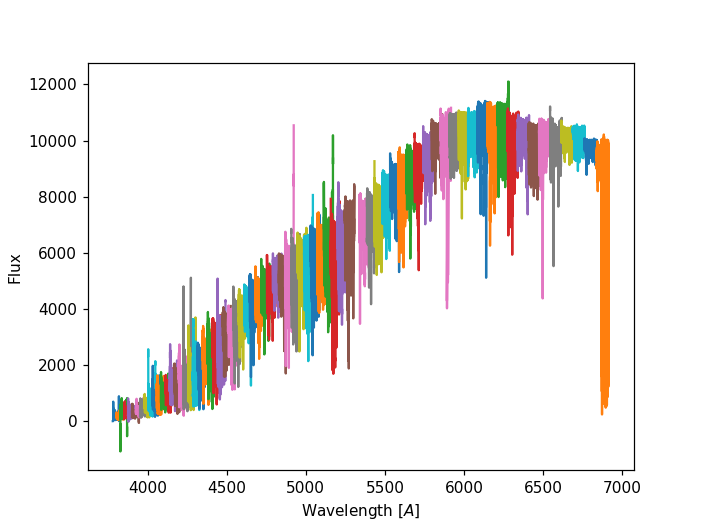

In [12]:


%matplotlib notebook 

import matplotlib.pyplot as plt 
plt.xlabel(r"Wavelength $[A]$")
plt.ylabel(r"Flux")
for i in range(len(combined_spectra[:,1])):
    plt.plot(combined_spectra[:,1][i], combined_spectra[:,2][i])



In [13]:

    
from funcs import store_spectrum_orders
save_dir = "Spectra/" + star_name + "/"

#Cross correlation method    
file_name = star_name + "_CCM" + ".txt"

store_spectrum_orders(combined_spectra[:,1],combined_spectra[:,2], save_dir = save_dir, file_name = file_name )

The spectrum for all orders has been stored in the file: Spectra/GJ9824/GJ9824_CCM.txt
